In [144]:
import re
from random import randint
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylev
import seaborn as sbn
import statistics as stats
import seaborn as sns

In [4]:
# Parameter for showing all columns when printing a dataframe
pd.set_option('display.max_columns', None)

In [24]:
estudiantes_df=pd.read_csv("StudentsPerformance_exam1.csv")

In [32]:
estudiantes_df.shape

(1000, 8)

In [8]:
estudiantes_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,non-binary,group B,bachelor's degree,standard,none,72.0,72.0,NaN
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,NaN,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,NaN,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,NaN,65.0
998,NaN,group D,some college,standard,completed,68.0,78.0,77.0


# 1

¿Qué tipo de variables tiene el dataset? Detalle el tipo de variable de cada
columna.


In [9]:
estudiantes_df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

# 2

¿Qué tipo de problemas de calidad de datos logra identificar? Defina e
implemente las estrategias de limpieza de datos que correspondan.


In [10]:
estudiantes_df.isnull().sum()

gender                         47
race/ethnicity                 45
parental level of education    60
lunch                          54
test preparation course        41
math score                     51
reading score                  48
writing score                  49
dtype: int64

In [51]:
estudiantes_df=estudiantes_df.dropna()

In [52]:
estudiantes_df["gender"].unique()

array(['female', 'male', 'non-binary'], dtype=object)

In [54]:
estudiantes_df["race/ethnicity"].unique()

array(['group C', 'group B', 'group D', 'group A', 'group E'],
      dtype=object)

In [55]:
estudiantes_df["parental level of education"].unique()

array(['some college', "master's degree", 'high school',
       "associate's degree", 'some high school', "bachelor's degree"],
      dtype=object)

In [56]:
estudiantes_df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

# 3

¿En qué asignatura en promedio los estudiantes obtuvieron un mejor puntaje?
¿Hay evidencia de algún sesgo en la distribución de dichos puntajes?


In [62]:
print("Promedio en math:")
print(round(stats.mean(estudiantes_df["math score"]),2))
print("Promedio en reading:")
print(round(stats.mean(estudiantes_df["reading score"]),2))
print("Promedio en writing:")
print(round(stats.mean(estudiantes_df["writing score"]),2))

Promedio en math:
66.27
Promedio en reading:
69.54
Promedio en writing:
68.47


C:\Users\Sebastian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


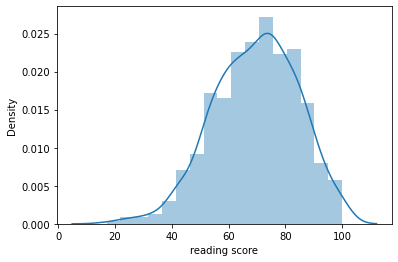

In [145]:
sns.distplot(estudiantes_df['reading score']);

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd79041250>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd790417f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd79037f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd79041d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd7904d040>],
 'means': []}

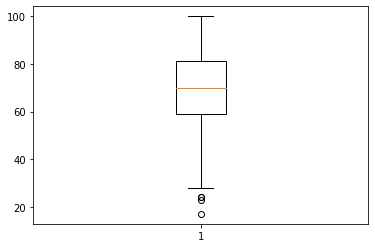

In [89]:
plt.boxplot(estudiantes_df["reading score"])

# 4

¿Existe alguna correlación entre los puntajes obtenidos en las tres asignaturas?

In [80]:
corr_df = estudiantes_df[{"math score","writing score", "reading score"}].corr()
print("The correlation is:")
print(corr_df, "\n")

The correlation is:
               math score  reading score  writing score
math score       1.000000       0.821609       0.806391
reading score    0.821609       1.000000       0.956514
writing score    0.806391       0.956514       1.000000 



C:\Users\Sebastian\AppData\Local\Temp\ipykernel_7148\3873842513.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  corr_df = estudiantes_df[{"math score","writing score", "reading score"}].corr()


<AxesSubplot:title={'center':'Math VS Reading'}, xlabel='math score', ylabel='reading score'>

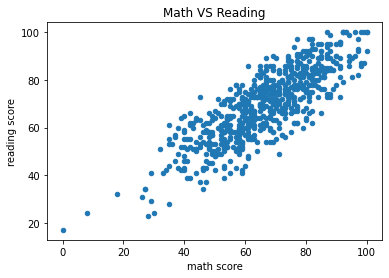

In [83]:
estudiantes_df.plot.scatter(x='math score', y='reading score',title='Math VS Reading')

<AxesSubplot:title={'center':'Writing VS Reading'}, xlabel='writing score', ylabel='reading score'>

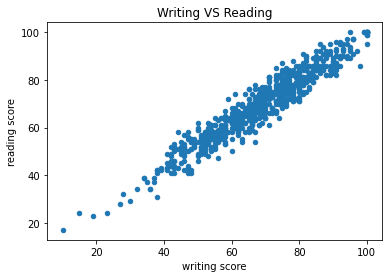

In [87]:
estudiantes_df.plot.scatter(x='writing score', y='reading score',title='Writing VS Reading')

<AxesSubplot:title={'center':'Math VS writing'}, xlabel='math score', ylabel='writing score'>

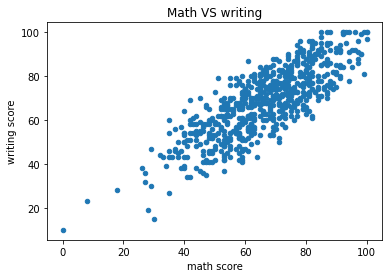

In [85]:
estudiantes_df.plot.scatter(x='math score', y='writing score',title='Math VS writing')

# 5

¿Hay alguna diferencia observable en los puntajes de la asignatura de
matemáticas entre géneros? ¿Qué género obtuvo en promedio los mejores
puntajes?


In [94]:
#Para realizar el analisis por generos se decide agrupar las variables 


In [107]:
(estudiantes_df.groupby(["gender"])['math score'].mean())

gender
female        63.647841
male          68.383764
non-binary    68.448980
Name: math score, dtype: float64

In [103]:
estudiantes_df.groupby(["gender"])['reading score'].mean()

gender
female        72.774086
male          65.354244
non-binary    71.214286
Name: reading score, dtype: float64

In [104]:
estudiantes_df.groupby(["gender"])['writing score'].mean()

gender
female        72.684385
male          63.472325
non-binary    69.357143
Name: writing score, dtype: float64

# 6

¿Qué nivel de escolaridad tienen los padres de los estudiantes que obtuvieron
un puntaje por encima del percentil 85 en la asignatura de escritura? ¿Cómo se
distribuye la escolaridad entre esta población?.

In [113]:
#Para separar a los estudiantes sobre el percentil 85 en esritura se calcula el percentil y luego se filtra en el dataset por 
#valores mayores o iguales

estudiantes_df.quantile(q=0.85, axis=0, numeric_only=True, interpolation='linear')

math score       82.0
reading score    85.0
writing score    85.0
Name: 0.85, dtype: float64

In [124]:
# a partir de  nota 85 se encuentra el percentil 85 

q85_df=estudiantes_df.loc[estudiantes_df["reading score"]> 85]

In [125]:
q85_df.shape

(97, 8)

In [130]:
100 * q85_df['parental level of education'].value_counts() / len(q85_df['parental level of education'])

associate's degree    26.804124
some college          21.649485
bachelor's degree     18.556701
some high school      15.463918
master's degree       10.309278
high school            7.216495
Name: parental level of education, dtype: float64

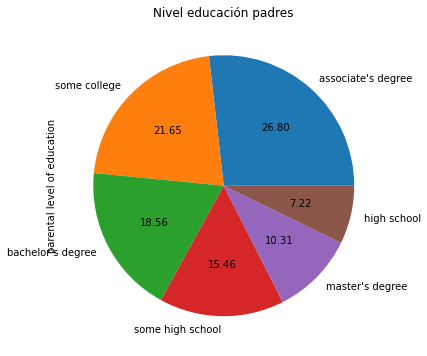

In [127]:
plot = q85_df['parental level of education'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Nivel educación padres')

# 7

¿Qué porcentaje de los estudiantes obtuvieron puntajes iguales o superiores a
90 en las tres asignaturas? De estos estudiantes¿que porcentaje estudió para
los exámenes?


In [133]:
#se realiza un filtro para obtener el dataset con estas caraterizticas

top_df=estudiantes_df.loc[(estudiantes_df["math score"]>=90)&(estudiantes_df["reading score"]>=90)&(estudiantes_df["writing score"]>=90)]

In [137]:
top_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
114,non-binary,group E,bachelor's degree,standard,completed,99.0,100.0,100.0
165,female,group C,bachelor's degree,standard,completed,96.0,100.0,100.0
451,female,group E,some college,standard,none,100.0,92.0,97.0
458,female,group E,bachelor's degree,standard,none,100.0,100.0,100.0


In [135]:
top_df.shape

(21, 8)

In [140]:
top_df["test preparation course"].value_counts()

completed    12
none          9
Name: test preparation course, dtype: int64

In [142]:
top_df["test preparation course"].value_counts()/ len(top_df["test preparation course"])*100

completed    57.142857
none         42.857143
Name: test preparation course, dtype: float64